In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%pylab inline 
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Split dataset into training and testing

In [84]:
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df = pd.DataFrame(data=np.c_[X_train, y_train],
                        columns=iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.6,3.6,1.0,0.2,0.0
1,5.7,4.4,1.5,0.4,0.0
2,6.7,3.1,4.4,1.4,1.0
3,4.8,3.4,1.6,0.2,0.0
4,4.4,3.2,1.3,0.2,0.0


#### Basic visualization of dataset

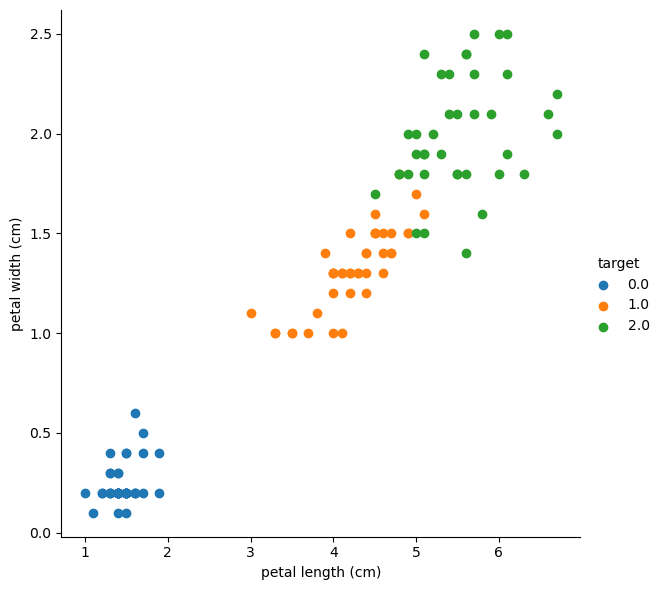

In [85]:
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

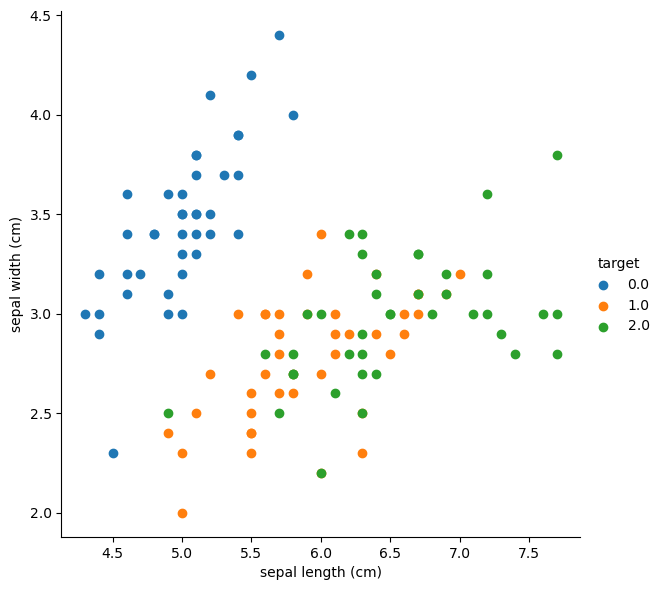

In [86]:
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend()

# Training Stage

We will first use random parameter to see how the Random Forest perform on the data.

In [87]:
from sklearn.ensemble import RandomForestClassifier
import math

random_seed = 42
forest = RandomForestClassifier(criterion='entropy',n_estimators=2, max_depth=6 , random_state=random_seed)

forest.fit(X_train, y_train)
print(f"Accuracy of classification of iris dataset using random forest for training dataset: {forest.score(X_train, y_train) * 100:.2f}%")

Accuracy of classification of iris dataset using random forest for training dataset: 95.00%


In [88]:
print(f"Accuracy of classification of iris dataset using random forest for testing dataset: {forest.score(X_test, y_test) * 100:.2f}%")

Accuracy of classification of iris dataset using random forest for testing dataset: 96.67%


## Hyperturning parameters

Now we will want to find the optimal parameters to improve the performance of our algorithm

### Larger range of parameters

In [89]:
from sklearn.model_selection import GridSearchCV

#define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

#initialize the model
forest = RandomForestClassifier(random_state=random_seed)

#perform GridSearchCV
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

#fit to the data
grid_search.fit(X_train, y_train)

#print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_ * 100:.2f}%")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation score: 95.00%


&nbsp;

### Limiting hypermeter into a smaller range

In [90]:
param_grid = {
    'n_estimators': [10, 20, 30, 50, 100], 
    'max_depth': [15, 20, 25], 
    'min_samples_split': [2, 3, 4, 5], 
    'min_samples_leaf': [1, 2, 3, 4],    
    'criterion': ['gini', 'entropy']  
}

forest = RandomForestClassifier(random_state=random_seed)

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_ * 100:.2f}%")

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation score: 95.00%


We now have two different sets of parameters for us to use to improve the performance of our model.

## Testing Stage

### Hyperparamters set 1

In [91]:
forest2 = RandomForestClassifier(criterion='gini', max_depth = 10, min_samples_leaf = 4, min_samples_split = 5, n_estimators = 50, random_state=random_seed)

forest2.fit(X_train, y_train)
print(f"Accuracy of classification of iris dataset using random forest for training dataset: {forest2.score(X_train, y_train) * 100:.2f}%")

Accuracy of classification of iris dataset using random forest for training dataset: 96.67%


In [92]:
print(f"Accuracy of classification of iris dataset using random forest for testing dataset: {forest2.score(X_test, y_test) * 100:.2f}%")

Accuracy of classification of iris dataset using random forest for testing dataset: 100.00%


&nbsp;

### Hyperparameters set 2

In [93]:
forest3 = RandomForestClassifier(criterion='gini', max_depth = 20, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 20, random_state=random_seed)

forest3.fit(X_train, y_train)
print(f"Accuracy of classification of iris dataset using random forest for training dataset: {forest3.score(X_train, y_train) * 100:.2f}%")

Accuracy of classification of iris dataset using random forest for training dataset: 97.50%


In [94]:
print(f"Accuracy of classification of iris dataset using random forest for testing dataset: {forest3.score(X_test, y_test) * 100:.2f}%")

Accuracy of classification of iris dataset using random forest for testing dataset: 100.00%


&nbsp;

## Visualisation of decision trees

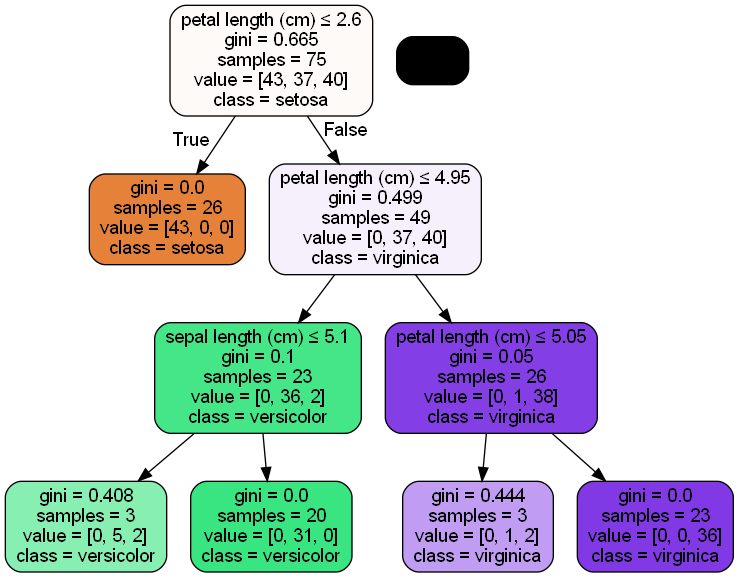

In [95]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from six import StringIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

tree = forest3.estimators_[1]


dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,
                filled=True, rounded=True,
                special_characters=True,
                )

# Create the graph using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the graph
Image(graph.create_png())



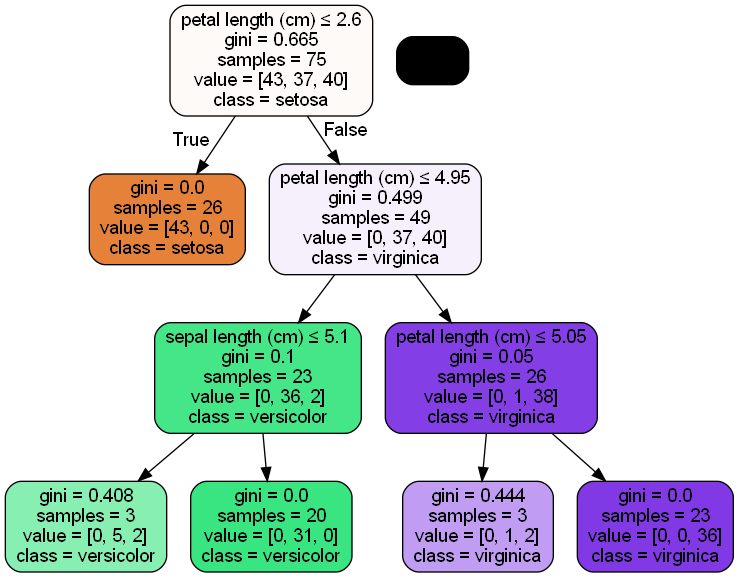

In [96]:
# Extract the single tree from the Random Forest
tree = forest3.estimators_[1]

# Visualize the tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,
                filled=True, rounded=True,
                special_characters=True)

# Create the graph using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the graph
Image(graph.create_png())

## Boostrapping Stage

In order to validate the performance of our model, now we would need to do bootstrapping to create new data samples by random sampling from our original data. This is mainly to avoid biases and problems like covariate shifts by providing more variation on the data sets. We would choose the **first set of parameters** as they yield a higher accuracy.

In [97]:
#creating a data frame
#numpy boostrap
def bootstrap_numpy(x, y, n_samples):
    #choosing a random indicies, indices can be repeated, which means that it is with replacement
    indices = np.random.choice(np.arange(len(x)), size=n_samples, replace=True)
    x_bootstrap = x[indices]
    y_bootstrap = y[indices]
    return x_bootstrap, y_bootstrap

In [98]:
# Generate multiple bootstrap samples
n_iterations = 20
#creating a bootstrap sample with the same size as the originial data set
bootstrap_samples = [bootstrap_numpy(X, y, len(X)) for _ in range(n_iterations)]

In [99]:
import time
train_times = []
test_times = []
accuracy_average = []

In [100]:
for i in range (len(bootstrap_samples)):
    #assigning the x and y from the boostrap sample
    features_boot = bootstrap_samples[i][0]
    features_target = bootstrap_samples[i][1]
    #splitting the data 
    X_train, X_test, y_train, y_test = train_test_split(features_boot, features_target, test_size=0.2, random_state= 42)
    
    #training
    train_time_start = time.time()
    forest2 = RandomForestClassifier(criterion='gini', max_depth = 10, min_samples_leaf = 4, min_samples_split = 5, n_estimators = 50, random_state=random_seed)
    forest2.fit(X_train, y_train)
    train_time_stop = time.time()
    train_time_total = train_time_stop - train_time_start
    print(f"Training Accuracy: {forest2.score(X_train, y_train) * 100:.2f}% for bootstrap sample {i+1}")
    
    #testing
    test_time_start = time.time()
    test_accuracy = forest2.score(X_test, y_test)
    test_time_stop = time.time()
    test_time_total = test_time_stop - test_time_start
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}% for bootstrap sample {i+1}")

    #predicting labels
    y_pred = forest2.predict(X_test)

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    #labels
    class_names = ['Setosa', 'Versicolor', 'Virginica']

    #create a DataFrame for better visualization
    conf_matrix_df = pd.DataFrame(cm, 
                                   index=class_names, 
                                   columns=class_names)

    #print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix_df)
    print("\n")
    train_times.append(train_time_total)
    test_times.append(test_time_total)
    accuracy_average.append(test_accuracy)
    
average_train = sum(train_times) / len(train_times)
average_test = sum(test_times) / len(test_times)
average_acuracy = sum(accuracy_average) / len(accuracy_average)
print(f"The Average training time is {average_train:.2f} | The Average testing time is {average_test:.5f} | The Average accuracy is {average_acuracy * 100:.2f}%")

Training Accuracy: 100.00% for bootstrap sample 1
Testing Accuracy: 93.33% for bootstrap sample 1
Confusion Matrix:
            Setosa  Versicolor  Virginica
Setosa          14           0          0
Versicolor       0          10          0
Virginica        0           2          4


Training Accuracy: 98.33% for bootstrap sample 2
Testing Accuracy: 100.00% for bootstrap sample 2
Confusion Matrix:
            Setosa  Versicolor  Virginica
Setosa          14           0          0
Versicolor       0           7          0
Virginica        0           0          9


Training Accuracy: 98.33% for bootstrap sample 3
Testing Accuracy: 96.67% for bootstrap sample 3
Confusion Matrix:
            Setosa  Versicolor  Virginica
Setosa           9           0          0
Versicolor       0          10          1
Virginica        0           0         10


Training Accuracy: 98.33% for bootstrap sample 4
Testing Accuracy: 96.67% for bootstrap sample 4
Confusion Matrix:
            Setosa  Versicol

The accuracy of Random Forest are always **above 93%** and we can see we do acheieve the **100%** quite an fair amount of times with 20 bootstrapped samples. And if we look closely, Iris Virginica and Iris versicolor is commonly mistaken as each other.